In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [3]:
nba_clusters = pd.read_csv('../data/clusters_w_all_data_2020.csv')

In [4]:
nba_data_shooting_data = nba_clusters.copy()

In [5]:
nba_data = nba_clusters.copy()

In [6]:
nba_data.drop(columns='cluster',inplace=True)

In [7]:
nba_data_shooting_data.drop(columns='cluster',inplace=True)

In [8]:
nba_clusters.head()

,Unnamed: 0,name,player_id,age,season,team,MP,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact,cluster
0,0,Bam Adebayo,adebaba01,22,2020,MIA,1865,0.473,8.8,24.2,16.8,22.5,1.8,3.4,17.2,19.9,4.1,3.0,7.1,0.183,0.578,5.7,0.980,0.480,0.307,0.147,0.046,0.020,0.588,0.746,0.462,0.438,0.250,0.083,0.711,0.234,130,1.00,0.667,0.125,-0.795731,2.169670,1.373940,3.506720,0.822734,4.329454,0.014715,1.999088,2.013802,4.648078,4.648078,-0.105324,1.108234,1.002910,-0.772876,5
1,1,LaMarcus Aldridge,aldrila01,34,2020,SAS,1661,0.245,6.4,18.1,12.2,11.3,0.9,4.3,7.9,23.3,3.3,1.3,4.6,0.133,0.495,13.7,0.801,0.203,0.129,0.226,0.244,0.199,0.520,0.712,0.475,0.460,0.441,0.392,0.558,0.042,29,0.95,0.183,0.393,-0.407140,0.526252,0.119112,-0.787673,-2.229078,-3.016751,-0.553316,0.024159,-0.529156,1.894905,1.894905,-0.516605,0.485455,-0.031150,-1.422240,4
2,2,Nickeil Alexander-Walker,alexani01,21,2020,NOP,501,0.123,1.7,15.3,8.4,20.5,1.0,1.2,14.3,22.9,-0.7,0.3,-0.4,-0.038,0.339,16.3,0.485,0.229,0.172,0.057,0.026,0.515,0.336,0.462,0.205,0.231,0.333,0.342,0.135,0.004,1,0.90,0.188,0.364,-3.090773,-1.731435,-4.822207,0.635783,-3.760455,-3.124671,-2.515123,-2.224647,-4.739770,-0.511053,-0.511053,-0.909961,-2.290986,-3.200948,0.490942,0
3,3,Grayson Allen,allengr01,24,2020,MEM,498,0.199,1.1,12.7,7.0,11.7,0.6,0.2,10.7,18.0,0.5,0.2,0.7,0.065,0.449,15.7,0.483,0.188,0.199,0.091,0.006,0.517,0.541,0.758,0.400,0.438,0.000,0.363,0.587,0.063,10,0.97,0.275,0.480,-0.156312,-1.571262,-1.727574,-1.034276,-3.017205,-4.051481,-0.329295,-1.954804,-2.284099,0.118917,0.118917,-0.632824,-2.583428,-3.216252,0.466596,3
4,4,Kyle Anderson,anderky01,26,2020,MEM,868,0.254,5.6,18.4,12.1,15.4,1.9,2.4,14.8,13.4,0.7,1.0,1.7,0.096,0.504,10.7,0.799,0.317,0.237,0.129,0.116,0.201,0.575,0.648,0.604,0.448,0.462,0.222,0.534,0.040,9,1.00,0.644,0.172,-0.664942,1.772078,1.107136,-6.238171,2.352928,-3.885243,-1.841386,2.015370,0.173984,1.363175,1.363175,-2.512889,1.281543,-1.231346,0.085884,5


In [53]:
stats_only = nba_clusters.drop(columns=['Unnamed: 0','name','player_id','age','season','MP','team','TRB%','OWS','DWS','WS','WS/48','FG%','Avg_shot_dist','%_3point_attempts','%FG_2point','3pt%','assisted_2pters','FG%_dunk_attempts','FG%_dunk_attempts','assisted_3pt%','raptor_box_offense','%_corner_3pters','made_dunks','%_corner_3_made','raptor_box_defense','raptor_box_total','raptor_onoff_offense','raptor_onoff_defense','raptor_onoff_total','raptor_offense','raptor_defense','raptor_total','war_total','war_reg_season','FTr','USG%','predator_offense','%_2point_attempts','predator_defense','predator_total','pace_impact','cluster','%_FG_0-3_dist','%_FG_3-10_dist','%_FG_10-16_dist','%_FG_10-16_dist.1'])




In [89]:
stats_only

,ORB%,DRB%,AST%,STL%,BLK%,TOV%,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist
0,8.8,24.2,22.5,1.8,3.4,17.2,0.480,0.307,0.147,0.046
1,6.4,18.1,11.3,0.9,4.3,7.9,0.203,0.129,0.226,0.244
2,1.7,15.3,20.5,1.0,1.2,14.3,0.229,0.172,0.057,0.026
3,1.1,12.7,11.7,0.6,0.2,10.7,0.188,0.199,0.091,0.006
4,5.6,18.4,15.4,1.9,2.4,14.8,0.317,0.237,0.129,0.116
5,8.4,32.9,34.0,1.6,3.0,13.0,0.488,0.160,0.067,0.046
6,4.2,16.6,6.7,1.2,1.2,10.4,0.200,0.097,0.228,0.183
7,4.1,15.1,7.5,1.9,2.2,12.1,0.453,0.109,0.020,0.011
8,2.2,10.7,14.5,1.3,0.4,13.5,0.149,0.099,0.089,0.020
9,2.7,16.6,8.1,2.3,0.9,12.3,0.188,0.042,0.012,0.018


In [10]:
shooting_stats_only = nba_data_shooting_data.drop(columns=['Unnamed: 0', 'name', 'player_id', 'age', 'season', 'team', 'MP', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'FG%', 'raptor_box_offense',
       'raptor_box_defense', 'raptor_box_total', 'raptor_onoff_offense',
       'raptor_onoff_defense', 'raptor_onoff_total', 'raptor_offense',
       'raptor_defense', 'raptor_total', 'war_total', 'war_reg_season',
       'predator_offense', 'predator_defense', 'predator_total',
       'pace_impact'])

In [39]:
shooting_stats_only.columns

Index(['Avg_shot_dist', '%_2point_attempts', '%_FGA_0-3_dist',
       '%_FGA_3-10_dist', '%_FGA_10-16_dist', '%_FGA_16-3pt_dist',
       '%_3point_attempts', '%FG_2point', '%_FG_0-3_dist', '%_FG_3-10_dist',
       '%_FG_10-16_dist', '%_FG_10-16_dist.1', '3pt%', 'assisted_2pters',
       'FG%_dunk_attempts', 'made_dunks', 'assisted_3pt%', '%_corner_3pters',
       '%_corner_3_made', 'name'],
      dtype='object')

In [11]:
nba_data_shooting_data.columns

Index(['Unnamed: 0', 'name', 'player_id', 'age', 'season', 'team', 'MP', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'FG%', 'Avg_shot_dist', '%_2point_attempts',
       '%_FGA_0-3_dist', '%_FGA_3-10_dist', '%_FGA_10-16_dist',
       '%_FGA_16-3pt_dist', '%_3point_attempts', '%FG_2point', '%_FG_0-3_dist',
       '%_FG_3-10_dist', '%_FG_10-16_dist', '%_FG_10-16_dist.1', '3pt%',
       'assisted_2pters', 'FG%_dunk_attempts', 'made_dunks', 'assisted_3pt%',
       '%_corner_3pters', '%_corner_3_made', 'raptor_box_offense',
       'raptor_box_defense', 'raptor_box_total', 'raptor_onoff_offense',
       'raptor_onoff_defense', 'raptor_onoff_total', 'raptor_offense',
       'raptor_defense', 'raptor_total', 'war_total', 'war_reg_season',
       'predator_offense', 'predator_defense', 'predator_total',
       'pace_impact'],
      dtype='object')

In [90]:
stats_only

,ORB%,DRB%,AST%,STL%,BLK%,TOV%,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist
0,8.8,24.2,22.5,1.8,3.4,17.2,0.480,0.307,0.147,0.046
1,6.4,18.1,11.3,0.9,4.3,7.9,0.203,0.129,0.226,0.244
2,1.7,15.3,20.5,1.0,1.2,14.3,0.229,0.172,0.057,0.026
3,1.1,12.7,11.7,0.6,0.2,10.7,0.188,0.199,0.091,0.006
4,5.6,18.4,15.4,1.9,2.4,14.8,0.317,0.237,0.129,0.116
5,8.4,32.9,34.0,1.6,3.0,13.0,0.488,0.160,0.067,0.046
6,4.2,16.6,6.7,1.2,1.2,10.4,0.200,0.097,0.228,0.183
7,4.1,15.1,7.5,1.9,2.2,12.1,0.453,0.109,0.020,0.011
8,2.2,10.7,14.5,1.3,0.4,13.5,0.149,0.099,0.089,0.020
9,2.7,16.6,8.1,2.3,0.9,12.3,0.188,0.042,0.012,0.018


In [91]:
standard_scaler = StandardScaler()

In [92]:
scaled_data = standard_scaler.fit_transform(stats_only)

In [93]:
scaled_data

array([[ 1.58407391,  1.64319071,  0.83552864, ...,  2.13435976,
         1.13479719, -0.50893175],
       [ 0.77296996,  0.56667743, -0.37837396, ..., -0.40990733,
         2.57894066,  3.0306974 ],
       [-0.81544195,  0.07254019,  0.61876032, ...,  0.20471899,
        -0.51042955, -0.86647005],
       ...,
       [ 0.67158197,  0.16077898, -0.4108892 , ...,  1.37679709,
        -1.20508084, -0.75920856],
       [-0.78164595, -0.54513136,  3.37171799, ...,  0.13325082,
         1.09823659, -0.47317792],
       [ 2.90211784,  1.09611019, -0.43256604, ...,  1.19097983,
        -1.00399757, -1.24188527]])

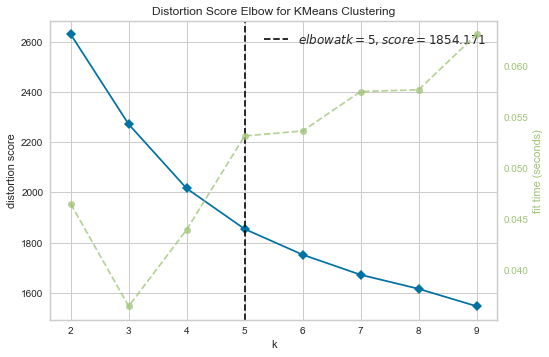

In [96]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(scaled_data)     # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [85]:
kmeans = KMeans(n_clusters = 4)

kmeans.fit(scaled_data)

y_kmeans = kmeans.predict(scaled_data)
kmeans.fit(scaled_data)

y_kmeans = kmeans.predict(scaled_data)

In [86]:
nba_data['cluster2'] = y_kmeans

In [87]:
nba_data[nba_data['cluster2'] ==0]

,Unnamed: 0,name,player_id,age,season,team,MP,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact,cluster,cluster2
2,2,Nickeil Alexander-Walker,alexani01,21,2020,NOP,501,0.123,1.7,15.3,8.4,20.5,1.0,1.2,14.3,22.9,-0.7,0.3,-0.4,-0.038,0.339,16.3,0.485,0.229,0.172,0.057,0.026,0.515,0.336,0.462,0.205,0.231,0.333,0.342,0.135,0.004,1,0.900,0.188,0.364,-3.090773,-1.731435,-4.822207,0.635783,-3.760455,-3.124671,-2.515123,-2.224647,-4.739770,-0.511053,-0.511053,-0.909961,-2.290986,-3.200948,0.490942,7,0
3,3,Grayson Allen,allengr01,24,2020,MEM,498,0.199,1.1,12.7,7.0,11.7,0.6,0.2,10.7,18.0,0.5,0.2,0.7,0.065,0.449,15.7,0.483,0.188,0.199,0.091,0.006,0.517,0.541,0.758,0.400,0.438,0.000,0.363,0.587,0.063,10,0.970,0.275,0.480,-0.156312,-1.571262,-1.727574,-1.034276,-3.017205,-4.051481,-0.329295,-1.954804,-2.284099,0.118917,0.118917,-0.632824,-2.583428,-3.216252,0.466596,0,0
7,7,OG Anunoby,anunoog01,22,2020,TOR,1574,0.147,4.1,15.1,9.7,7.5,1.9,2.2,12.1,14.6,1.3,2.6,3.8,0.117,0.499,11.7,0.593,0.453,0.109,0.020,0.011,0.407,0.592,0.683,0.300,0.333,0.200,0.364,0.665,0.153,67,0.941,0.497,0.355,-2.055293,1.789890,-0.265403,1.652727,-1.160509,0.492217,-1.426298,1.236302,-0.189997,2.107256,2.107256,-1.315347,1.538165,0.222818,0.023965,4,0
8,8,Ryan Arcidiacono,arcidry01,25,2020,CHI,765,0.156,2.2,10.7,6.3,14.5,1.3,0.4,13.5,12.4,0.6,0.6,1.2,0.073,0.396,18.8,0.356,0.149,0.099,0.089,0.020,0.644,0.417,0.567,0.250,0.333,0.500,0.385,0.533,0.000,0,0.880,0.300,0.462,-0.767172,1.738517,0.971346,-3.569935,2.766317,-0.803618,-1.343738,2.064917,0.721179,1.467665,1.467665,-2.147253,1.182332,-0.964921,0.212554,8,0
9,9,Trevor Ariza,arizatr01,34,2020,POR,1138,0.171,2.7,16.6,9.5,8.1,2.3,0.9,12.3,11.4,0.9,1.1,2.0,0.083,0.388,19.4,0.261,0.188,0.042,0.012,0.018,0.739,0.488,0.677,0.000,0.000,0.000,0.352,0.571,0.036,6,0.977,0.369,0.333,-0.606407,2.606225,1.999818,4.033676,-2.632684,1.400992,0.314969,1.706702,2.021672,0.932752,0.932752,0.078913,1.796055,1.874968,0.303878,8,0
16,21,Harrison Barnes,barneha02,27,2020,SAC,1870,0.353,3.0,13.2,8.0,9.4,0.8,0.4,8.6,17.7,2.4,0.9,3.3,0.085,0.456,11.9,0.659,0.284,0.285,0.061,0.029,0.341,0.496,0.685,0.369,0.342,0.222,0.379,0.512,0.040,23,0.864,0.374,0.350,-0.083448,-0.700557,-0.784005,0.058740,0.980259,1.038999,-0.041032,-0.380095,-0.421126,2.318501,2.318501,-0.301642,-0.447422,-0.749063,0.224564,1,0
17,22,RJ Barrett,barrerj01,19,2020,NYK,1372,0.356,3.3,14.7,8.8,12.1,1.6,1.1,12.5,23.2,-1.5,0.9,-0.5,-0.019,0.389,10.6,0.735,0.392,0.209,0.059,0.075,0.265,0.418,0.550,0.244,0.314,0.295,0.308,0.348,0.061,30,0.979,0.340,0.340,-2.304973,-1.580555,-3.885529,-3.226085,-3.486398,-6.712484,-2.556539,-2.044706,-4.601245,-1.331308,-1.331308,-3.061583,-1.595233,-4.656816,0.767843,7,0
18,23,Will Barton,bartowi01,29,2020,DEN,1598,0.183,4.9,16.6,10.7,16.3,1.6,1.4,9.1,19.9,2.2,1.9,4.1,0.123,0.445,14.2,0.629,0.281,0.187,0.085,0.077,0.371,0.484,0.598,0.319,0.407,0.551,0.380,0.371,0.036,22,0.689,0.118,0.500,1.914492,1.247581,3.162074,2.811459,1.789293,4.600753,2.192821,1.414281,3.607102,5.248777,5.248777,1.591961,1.781561,3.373522,-0.670278,1,0
19,24,Keita Bates-Diop,bateske01,24,2020,MIN,665,0.332,3.2,14.8,8.8,6.6,1.2,2.6,5.5,15.7,0.7,0.5,1.2,0.087,0.422,13.4,0.544,0.354,0.136,0.039,0.015,0.456,0.500,0.644,0.250,0.125,0.333,0.330,0.661,0.039,8,0.968,0.404,0.421,-1.273453,-2.564126,-3.837579,-7.523192,-1.086735,-8.609927,-2.636698,-2.397015,-5.033713,-0.747574,-0.747574,-3.444855,-2.605592,-6.050447,-0.693060,6,0
22,30,Kent Ba

In [77]:
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(scaled_data, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2163565551902617
For n_clusters = 3, silhouette score is 0.16383518214410522
For n_clusters = 4, silhouette score is 0.16854351407202975
For n_clusters = 5, silhouette score is 0.15446718358232187
For n_clusters = 6, silhouette score is 0.13843933187801902
For n_clusters = 7, silhouette score is 0.13392507140712034
For n_clusters = 8, silhouette score is 0.13216140164567616
For n_clusters = 9, silhouette score is 0.12352139681786042
For n_clusters = 10, silhouette score is 0.128569959047126
For n_clusters = 11, silhouette score is 0.12846951434189632
For n_clusters = 12, silhouette score is 0.12916683731814907
For n_clusters = 13, silhouette score is 0.12459848065130681
For n_clusters = 14, silhouette score is 0.1252051362756986
For n_clusters = 15, silhouette score is 0.12594870079259363
For n_clusters = 16, silhouette score is 0.13422035381730013
For n_clusters = 17, silhouette score is 0.13018411234889646
For n_clusters = 18, silhouette scor

In [59]:
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(shooting_scaled)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(shooting_scaled, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.22938897349972565
For n_clusters = 3, silhouette score is 0.1524535047784838
For n_clusters = 4, silhouette score is 0.12677528365299964
For n_clusters = 5, silhouette score is 0.11462712302819063
For n_clusters = 6, silhouette score is 0.11102260937066187
For n_clusters = 7, silhouette score is 0.10174544634035411
For n_clusters = 8, silhouette score is 0.10428788583309435
For n_clusters = 9, silhouette score is 0.10056441764030852
For n_clusters = 10, silhouette score is 0.09362736668784609
For n_clusters = 11, silhouette score is 0.087870614432313
For n_clusters = 12, silhouette score is 0.08644006117603131
For n_clusters = 13, silhouette score is 0.07522023729288349
For n_clusters = 14, silhouette score is 0.08518056284441783
For n_clusters = 15, silhouette score is 0.08054272071813058
For n_clusters = 16, silhouette score is 0.09298020925636685
For n_clusters = 17, silhouette score is 0.09215033938212254
For n_clusters = 18, silhouette sco

In [ ]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

In [ ]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

In [23]:
shooting_scaled = standard_scaler.fit_transform(shooting_stats_only)

In [24]:
shooting_scaled

array([[-2.27991505,  2.25718837,  1.57939965, ...,  0.84088162,
         3.08623142, -1.7372188 ],
       [-0.20134234,  1.22876922, -0.50556337, ...,  0.54177847,
        -0.42139549,  0.12641489],
       [ 0.47419379, -0.58676402, -0.30986287, ...,  0.24267533,
        -0.38515967, -0.07524696],
       ...,
       [-0.6690212 ,  0.2807851 ,  0.45788525, ...,  0.41615515,
         1.4628669 , -0.15173939],
       [ 0.57812242, -0.24204251, -0.64857527, ..., -3.44825749,
        -1.50846994,  1.73970973],
       [-2.02009346,  1.44709284,  2.2116628 , ...,  0.48793991,
        -1.34178519,  0.8704776 ]])

In [26]:
kmeans = KMeans(n_clusters = 4)

kmeans.fit(shooting_scaled)

y_kmeans = kmeans.predict(shooting_scaled)
kmeans.fit(shooting_scaled)

y_kmeans = kmeans.predict(shooting_scaled)

In [27]:
nba_data_shooting_data['cluster'] = y_kmeans

In [34]:
pd.set_option('display.max_rows', 500)

In [37]:
nba_data_shooting_data[nba_data_shooting_data['cluster']==0]

,Unnamed: 0,name,player_id,age,season,team,MP,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact,cluster
1,1,LaMarcus Aldridge,aldrila01,34,2020,SAS,1661,0.245,6.4,18.1,12.2,11.3,0.9,4.3,7.9,23.3,3.3,1.3,4.6,0.133,0.495,13.7,0.801,0.203,0.129,0.226,0.244,0.199,0.520,0.712,0.475,0.460,0.441,0.392,0.558,0.042,29,0.950,0.183,0.393,-0.407140,0.526252,0.119112,-0.787673,-2.229078,-3.016751,-0.553316,0.024159,-0.529156,1.894905,1.894905,-0.516605,0.485455,-0.031150,-1.422240,0
2,2,Nickeil Alexander-Walker,alexani01,21,2020,NOP,501,0.123,1.7,15.3,8.4,20.5,1.0,1.2,14.3,22.9,-0.7,0.3,-0.4,-0.038,0.339,16.3,0.485,0.229,0.172,0.057,0.026,0.515,0.336,0.462,0.205,0.231,0.333,0.342,0.135,0.004,1,0.900,0.188,0.364,-3.090773,-1.731435,-4.822207,0.635783,-3.760455,-3.124671,-2.515123,-2.224647,-4.739770,-0.511053,-0.511053,-0.909961,-2.290986,-3.200948,0.490942,0
6,6,Carmelo Anthony,anthoca01,35,2020,POR,1299,0.187,4.2,16.6,10.5,6.7,1.2,1.2,10.4,21.9,-0.3,0.8,0.5,0.018,0.419,14.5,0.708,0.200,0.097,0.228,0.183,0.292,0.444,0.525,0.456,0.410,0.389,0.360,0.427,0.031,12,0.919,0.180,0.516,-2.890136,-3.671839,-6.561975,1.925861,-3.050475,-1.124614,-2.094426,-3.731241,-5.825667,-2.065229,-2.065229,-1.349973,-3.269737,-4.619710,-1.142194,0
10,15,D.J. Augustin,augusdj01,32,2020,ORL,1013,0.399,1.5,8.7,5.0,27.2,1.3,0.1,12.4,18.8,1.5,0.8,2.3,0.108,0.390,17.2,0.579,0.177,0.177,0.131,0.095,0.421,0.426,0.569,0.241,0.535,0.355,0.341,0.160,0.000,0,0.574,0.123,0.294,0.166881,-2.190797,-2.023917,-3.436023,5.002608,1.566585,-0.530462,-0.867571,-1.398033,0.697854,0.697854,-0.967997,-0.863065,-1.831063,-1.713870,0
11,16,Dwayne Bacon,bacondw01,24,2020,CHA,687,0.217,2.3,14.0,7.9,11.6,1.7,0.3,12.2,19.4,-1.2,0.4,-0.8,-0.054,0.348,11.6,0.725,0.320,0.238,0.107,0.061,0.275,0.373,0.449,0.345,0.231,0.333,0.284,0.470,0.012,3,0.895,0.149,0.300,-5.284590,-1.092101,-6.376691,-2.822163,1.925780,-0.896382,-5.033294,-0.487714,-5.521008,-0.966704,-0.966704,-4.654743,-1.642332,-6.297075,-0.478437,0
15,20,J.J. Barea,bareajo01,35,2020,DAL,263,0.109,3.2,10.2,6.8,37.5,0.6,0.3,13.5,25.3,0.7,0.1,0.8,0.148,0.446,14.3,0.612,0.281,0.144,0.122,0.065,0.388,0.459,0.590,0.350,0.294,0.444,0.426,0.103,0.000,0,0.391,0.130,0.571,3.346873,0.656902,4.003774,2.106737,-1.902222,0.204515,3.166027,0.162938,3.328965,0.874522,0.874522,3.780583,-2.009293,1.771290,-0.011383,0
18,23,Will Barton,bartowi01,29,2020,DEN,1598,0.183,4.9,16.6,10.7,16.3,1.6,1.4,9.1,19.9,2.2,1.9,4.1,0.123,0.445,14.2,0.629,0.281,0.187,0.085,0.077,0.371,0.484,0.598,0.319,0.407,0.551,0.380,0.371,0.036,22,0.689,0.118,0.500,1.914492,1.247581,3.162074,2.811459,1.789293,4.600753,2.192821,1.414281,3.607102,5.248777,5.248777,1.591961,1.781561,3.373522,-0.670278,0
24,39,Bradley Beal,bealbr01,26,2020,WAS,1635,0.358,2.9,10.8,6.7,29.0,1.4,0.9,11.2,33.5,3.7,0.2,3.9,0.116,0.453,14.5,0.640,0.246,0.142,0.135,0.117,0.360,0.528,0.687,0.404,0.458,0.424,0.320,0.361,0.030,29,0.650,0.130,0.340,5.070366,-3.096793,1.973572,3.054323,-7.410316,-4.355993,4.958276,-4.112050,0.846226,3.092421,3.092421,4.959289,-4.190755,0.768534,1.004448,0
32,54,Eric Bledsoe,bledser01,30,2020,MIL,1246,0.295,2.9,13.6,8.6,28.2,1.6,1.5,15.0,24.2,2.2,2.3,4.6,0.175,0.482,12.0,0.697,0.341,0.192,0.095,0.068,0.303,0.542,0.711,0.360,0.418,0.385,0.343,0.303,0.003,2,0.450,0.126,0.273,2.222293,0.944855,3.167147,1.467273,1.987006,3.454278,2.129428,1.131433,3.260862,4.041952,4.041952,1.717117,0.930457,2.647574,1.412285,0
36,58,Devin Booker,bookede01,23,2020,PHO,

In [ ]:
shooting_stats_only['cluster'] = y_kmeans

In [29]:
 shooting_stats_only['name'] = nba_data_shooting_data['name']

In [30]:
shooting_stats_only

,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,name
0,5.7,0.980,0.480,0.307,0.147,0.046,0.020,0.588,0.746,0.462,0.438,0.250,0.083,0.711,0.234,130,1.000,0.667,0.125,Bam Adebayo
1,13.7,0.801,0.203,0.129,0.226,0.244,0.199,0.520,0.712,0.475,0.460,0.441,0.392,0.558,0.042,29,0.950,0.183,0.393,LaMarcus Aldridge
2,16.3,0.485,0.229,0.172,0.057,0.026,0.515,0.336,0.462,0.205,0.231,0.333,0.342,0.135,0.004,1,0.900,0.188,0.364,Nickeil Alexander-Walker
3,15.7,0.483,0.188,0.199,0.091,0.006,0.517,0.541,0.758,0.400,0.438,0.000,0.363,0.587,0.063,10,0.970,0.275,0.480,Grayson Allen
4,10.7,0.799,0.317,0.237,0.129,0.116,0.201,0.575,0.648,0.604,0.448,0.462,0.222,0.534,0.040,9,1.000,0.644,0.172,Kyle Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,11.4,0.712,0.407,0.219,0.033,0.053,0.288,0.636,0.800,0.419,0.308,0.476,0.381,0.702,0.247,89,0.907,0.283,0.375,Christian Wood
331,10.8,0.704,0.373,0.272,0.034,0.025,0.296,0.513,0.645,0.364,0.455,0.250,0.375,0.282,0.019,5,0.806,0.156,0.533,Delon Wright
332,11.9,0.636,0.331,0.254,0.019,0.032,0.364,0.497,0.594,0.418,0.100,0.353,0.365,0.587,0.049,23,0.929,0.443,0.353,Thaddeus Young
333,16.7,0.545,0.184,0.167,0.145,0.048,0.455,0.504,0.598,0.459,0.471,0.404,0.374,0.165,0.000,0,0.283,0.033,0.625,Trae Young


In [20]:
shooting_stats_only[shooting_stats_only['cluster']==]

SyntaxError: invalid syntax (<ipython-input-20-59ed0fe94c41>, line 1)